In [2]:
import os
from pyschism.forcing.nws import GFS, HRRR, ERA5, BestTrackForcing
from datetime import datetime, timedelta
import pathlib

from pyschism.mesh.base import Elements
from pyschism.mesh.base import Gr3
from pyschism.mesh.gridgr3 import Gr3Field
from pyschism.param.param import Param
import ocsmesh
import pyschism
import pyschism.driver

from __future__ import annotations
from copy import deepcopy
from datetime import datetime, timedelta
from pathlib import Path

#hgrid = pyschism.mesh.Hgrid.open('tidal.schism.pahm.adcirc/ww3_at_sch.gr3', crs=4326)

#hgrid = pyschism.mesh.Hgrid.open('/contrib/Yunfang.Sun/CoastalApp-testsuite/comm/mesh/fort_1.14', crs=4326)

#hgrid = pyschism.mesh.Hgrid.open('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/hgrid.gr3', crs=4326)
m1 = ocsmesh.Mesh.open('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/hgrid.gr3', crs=4326)
crd1 = m1.msh_t.vert2['coord']
crdmap1 = {tuple(coo): i for i, coo in enumerate(crd1)}
dupl1 = [i for i, coo in enumerate(crd1) if crdmap1[tuple(coo)] != i]

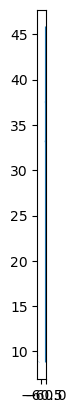

In [8]:
#from pyschism.mesh.Hgrid import Hgrid

hg = pyschism.mesh.Hgrid.open('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/hgrid.gr3', crs=4326)
hg.boundaries.open.drop(columns=['indexes', 'index_id']).set_index('id').to_file('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/open')
m = ocsmesh.Mesh.open('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/hgrid.gr3', crs=4326)                                                                                                                                                                                                                                           
m.boundaries.open().plot()
from matplotlib import pyplot as plt
plt.show()
from shapely import box
m.boundaries.set_land(box(-100, 0, -61, 60))

In [9]:
import ocsmesh
from shapely import box
m = ocsmesh.Mesh.open('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/hgrid.gr3', crs=4326)
ocsmesh.utils.cleanup_isolates(m.msh_t)
m.boundaries.auto_generate(threshold=-10)
m.boundaries.set_land(box(-100, 0, -60.5, 60))
m.write('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/clean_hgrid.gr3', format='grd')

In [10]:
import os
from pyschism.forcing.nws import GFS, HRRR, ERA5, BestTrackForcing
from datetime import datetime, timedelta
import pathlib

from pyschism.mesh.base import Elements
from pyschism.mesh.base import Gr3
from pyschism.mesh.gridgr3 import Gr3Field
from pyschism.param.param import Param
import ocsmesh
import pyschism
import pyschism.driver

from __future__ import annotations
from copy import deepcopy
from datetime import datetime, timedelta
from pathlib import Path

#hgrid = pyschism.mesh.Hgrid.open('tidal.schism.pahm.adcirc/ww3_at_sch.gr3', crs=4326)

#hgrid = pyschism.mesh.Hgrid.open('/contrib/Yunfang.Sun/CoastalApp-testsuite/comm/mesh/fort_1.14', crs=4326)

hgrid = pyschism.mesh.Hgrid.open('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected/clean_hgrid.gr3', crs=4326)


dramp = timedelta(days=8.)



atmospheric = BestTrackForcing.from_nhc_bdeck(nhc_bdeck='hurricane-track.dat') 

fgrid = pyschism.mesh.ManningsN.linear_with_depth(
    hgrid,
    min_value=0.02, max_value=0.05,
    min_depth=-1.0, max_depth=-3.0)


config = pyschism.driver.ModelConfig(
    hgrid=hgrid,
    fgrid=fgrid,
#    iettype=pyschism.forcing.bctides.iettype.Iettype3(database="tpxo"),
#    ifltype=pyschism.forcing.bctides.ifltype.Ifltype3(database="tpxo"),

    flags=[[3,3,0,0] for i in hgrid.boundaries.open.itertuples()],
    constituents = 'major',
    database = 'tpxo',
#    nws=atmospheric,
#    nws=NWS2(ERA5()),
    )




coldstart = config.coldstart(
    start_date=datetime(2022,9,15) ,
    end_date=datetime(2022,10,7),       
    timestep=timedelta(seconds=150),
    dramp=dramp,
    dramp_ss=dramp,
    drampwind=dramp,
    nspool=timedelta(hours=1),
    elev=True,
    dahv=True,
    )

coldstart.write(Path('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected_2/'), overwrite=True)

/contrib/Yunfang.Sun/conda3/envs/adcirc_subset_schism_dask_new/lib/python3.11/site-packages/stormevents/nhc/track.py:173: UserWarning: It is recommended to specify the file_deck and/or advisories when reading from file
  warnings.warn(


Temperature is not sepcified, not input needed!
Temperature is not sepcified, not input needed!


In [13]:
from pyschism.mesh import Hgrid, gridgr3
windrot = gridgr3.Windrot.default(hgrid)
windrot.write('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected_2/' + "windrot_geo2proj.gr3", overwrite=True)

In [14]:
atm_bbox = hgrid.bbox
        
        #sflux_dir = output_directory+"/sflux"
        #os.mkdir(sflux_dir)
        #sflux_dir = os.path.join("r", run_directory, "sflux")
sflux_dir = ('/contrib/Yunfang.Sun/sunflow/myflow/subset/subset_corrected_2/' + "sflux")
os.makedirs(sflux_dir, exist_ok=True)

era5 = ERA5()
era5.write(
#    outdir=sflux_dir,
    outdir=pathlib.Path(sflux_dir),
    start_date=datetime(2022,9,15),
#    end_date=datetime(2022,10,15), 
    rnday=22,
#    rnday=timedelta(days=30.),
    air=True, rad=True, prc=True,
    bbox=atm_bbox,
    overwrite=True)

2024-08-14 20:32:04,281 INFO Welcome to the CDS.
 As per our announcements on the Forum, this instance of CDS will soon be decommissioned.
 Please update your cdsapi package to a version >=0.7.0, create an account on CDS-Beta and update your .cdsapirc file. We strongly recommend users to check our Guidelines at https://confluence.ecmwf.int/x/uINmFw
 The current legacy system will be kept for a while, but we will reduce resources gradually until full decommissioning in September 2024.


Welcome to the CDS.
 As per our announcements on the Forum, this instance of CDS will soon be decommissioned.
 Please update your cdsapi package to a version >=0.7.0, create an account on CDS-Beta and update your .cdsapirc file. We strongly recommend users to check our Guidelines at https://confluence.ecmwf.int/x/uINmFw
 The current legacy system will be kept for a while, but we will reduce resources gradually until full decommissioning in September 2024.


2024-08-14 20:32:04,282 WARNING MOVE TO CDS-Beta


MOVE TO CDS-Beta


2024-08-14 20:32:04,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-08-14 20:32:04,683 INFO Request is completed


Request is completed


2024-08-14 20:32:04,684 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/adaptor.mars.internal-1723566518.9296668-24668-15-c83d630e-03cc-46f7-9c76-3c3f2963f6dd.nc to /tmp/tmpte_mtsz6/era5_20220915.nc (215.3M)


2024-08-14 20:32:24,889 INFO Download rate 10.7M/s                                                                                                 


Download rate 10.7M/s
